# World Health Organization Data Analysis

#### import Libraries

In [462]:
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import datetime
from matplotlib.pyplot import scatter, xlabel, ylabel, savefig
import matplotlib.patches as mpatches #2D

%matplotlib inline



#### Read the xls either bypct for per 100k of population or without it for absolute numbers. Also Index if not treated will appear as 1985-12-31. Using the strftime method keep the Year as CCYY format

In [463]:

df = pd.read_excel(r'DataFileAssignmentbypct.xls', parse_dates=True, index_col="Year" )
df.head(5)
df.index = pd.DatetimeIndex.strftime(df.index, '%Y') # Display year in CCYY format
df.index.name = 'Year' # function DatetimeIndex.strftime removes the index name, may be a bug


In [464]:
df.tail(5)

,Country,IncomeLevel,TotalPop,PopMale,PopFemale,TransportAccAll,TransportAccMale,TransportAccFemale,FallsAll,FallsMale,...,SuicideMale,SuicideFemale,AssaultAll,AssaultMale,AssaultFemale,OtherAll,OtherMale,OtherFemale,PeaceRanking,TotalDeath
Year,,,,,,,,,,,,,,,,,,,,,
2015,URUGUAY,High Income,3432000.0,52000.0,48000.0,14.423077,11.538462,2.884615,0.037356,0.022074,...,13.578089,3.933566,6.439394,5.390443,1.048951,25.466200,13.927739,11.538462,2,69.522145
2015,UZBEKISTAN,Lower Middle Income,29893000.0,53000.0,47000.0,8.503663,6.851102,1.652561,0.003122,0.002619,...,4.710133,2.308233,1.391630,1.033687,0.357943,7.841301,6.185395,1.655906,6,30.803198
2015,VENEZUELA,Upper Middle Income,31108000.0,52500.0,47500.0,22.717629,18.876173,3.841456,0.006965,0.004619,...,1.610518,0.376109,28.436415,26.851614,1.584801,36.058249,31.866401,4.191848,6,93.445416
2015,VIRGIN ISLANDS,High Income,106000.0,53000.0,47000.0,16.037736,11.320755,4.716981,0.000000,0.000000,...,5.660377,3.773585,49.056604,47.169811,1.886792,9.433962,8.490566,0.943396,0,94.339623
2015,ZIMBABWE,Low Income,15603000.0,51500.0,48500.0,8.530411,6.524386,2.006024,0.005545,0.003656,...,3.275011,1.647119,3.762097,2.589246,1.172851,5.024675,3.255784,1.768891,7,28.488111


In [465]:
# Check for any missing values
df.isnull().values.any()

False

In [466]:
df.columns
totaldf = df

####  Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        xdf: pandas DataFrame
        xcountry: country for which the dataframe is considered    
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns. 

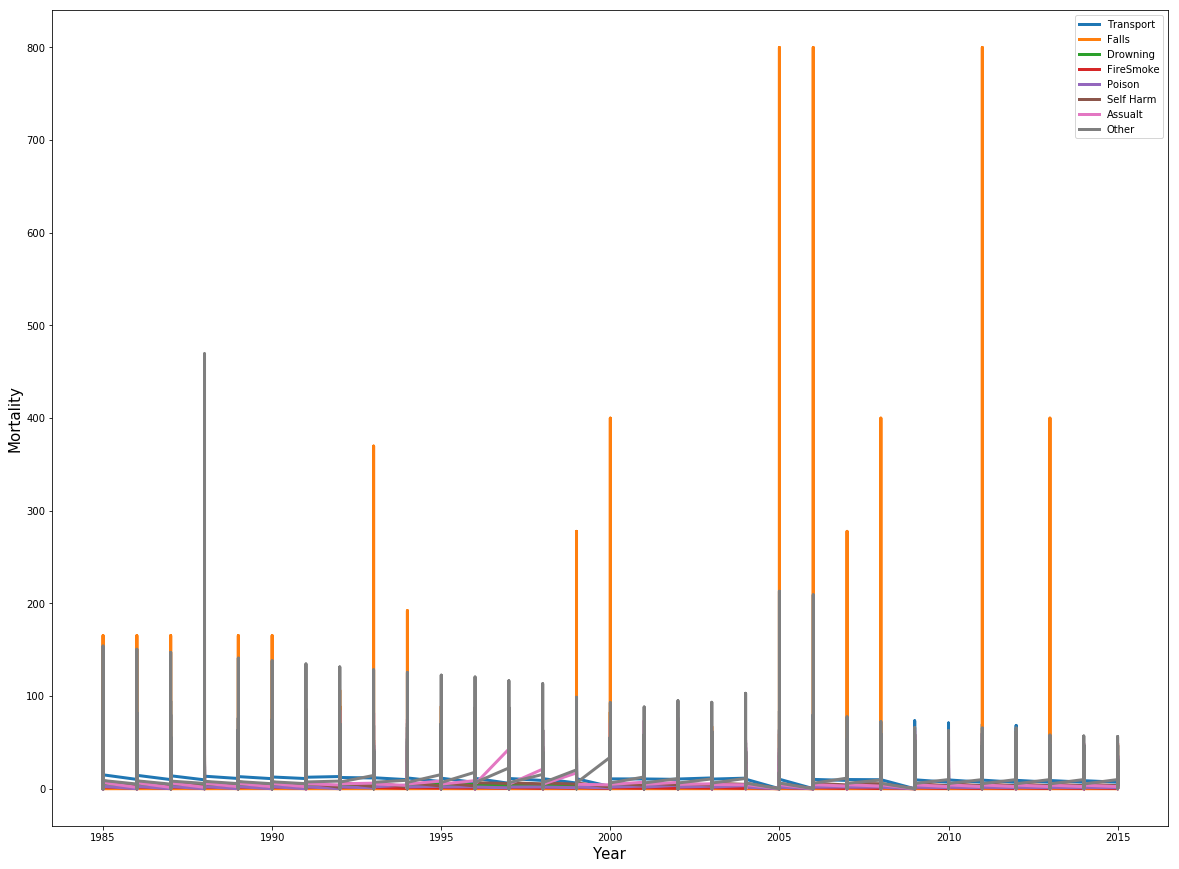

In [467]:
plt.figure(figsize=(20,15))
plt.subplot(111)     


X = totaldf.index
predicted_class_names = ['TransportAccAll', 'FallsAll','DrowningAll', 'FireAll', 'PoisonAll', 'SuicideAll','AssaultAll','OtherAll']

#X = totaldf[feature_col_names].values     # predictor feature columns (8 X m)
y = totaldf[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
#split_test_size = 0.30

plt.plot(X,  totaldf.TransportAccAll, linewidth=3.0, label='Transport')
plt.plot(X,  totaldf.FallsAll, linewidth=3.0, label='Falls')
plt.plot(X,  totaldf.DrowningAll, linewidth=3.0, label='Drowning')
plt.plot(X,  totaldf.FireAll, linewidth=3.0, label='FireSmoke')
plt.plot(X,  totaldf.PoisonAll, linewidth=3.0, label='Poison')
plt.plot(X,  totaldf.SuicideAll, linewidth=3.0, label='Self Harm')
plt.plot(X,  totaldf.AssaultAll, linewidth=3.0, label='Assualt')
plt.plot(X,  totaldf.OtherAll, linewidth=3.0, label='Other')
plt.xlabel('Year', size=15)
plt.ylabel('Mortality',size=15)
plt.legend(title='Accidental/SelfHarm/Assualt Deaths', fontsize=25)
plt.legend()
plt.show()

## KNN Model

#### Keep the data for an year only for all countries for KNN Model. This will have 139 total Observations, which was split as 117 Test and 22 as Train data sets

In [468]:
totaldf.columns

Index(['Country', 'IncomeLevel', 'TotalPop', 'PopMale', 'PopFemale',
       'TransportAccAll', 'TransportAccMale', 'TransportAccFemale', 'FallsAll',
       'FallsMale', 'FallsFemale', 'DrowningAll', 'DrowningMale',
       'DrowningFemale', 'FireAll', 'FireMale', 'FireFemale', 'PoisonAll',
       'PoisonMale', 'PoisonFemale', 'SuicideAll', 'SuicideMale',
       'SuicideFemale', 'AssaultAll', 'AssaultMale', 'AssaultFemale',
       'OtherAll', 'OtherMale', 'OtherFemale', 'PeaceRanking', 'TotalDeath'],
      dtype='object')

#### Function to draw a graph of Correlation between variables in the dataset. As the graph shows they are all Independent variables.

In [469]:
def plot_yearcorr(xdf, xyear, size=20): 

    columns = ['PopMale', 'PopFemale', 'TransportAccMale', 'TransportAccFemale', 'FallsMale', 'FallsFemale', 'DrowningMale', 'DrowningFemale','FireMale', 'FireFemale', 'PoisonMale', 'PoisonFemale', 'SuicideMale', 'SuicideFemale','AssaultMale','AssaultFemale','OtherMale','OtherFemale' ]

    totaldf = xdf.drop(columns, axis = 1)
    totaldf = totaldf[totaldf.index == xyear].set_index(["Country"])
   
 
    corr = totaldf.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks
    
    return totaldf
    

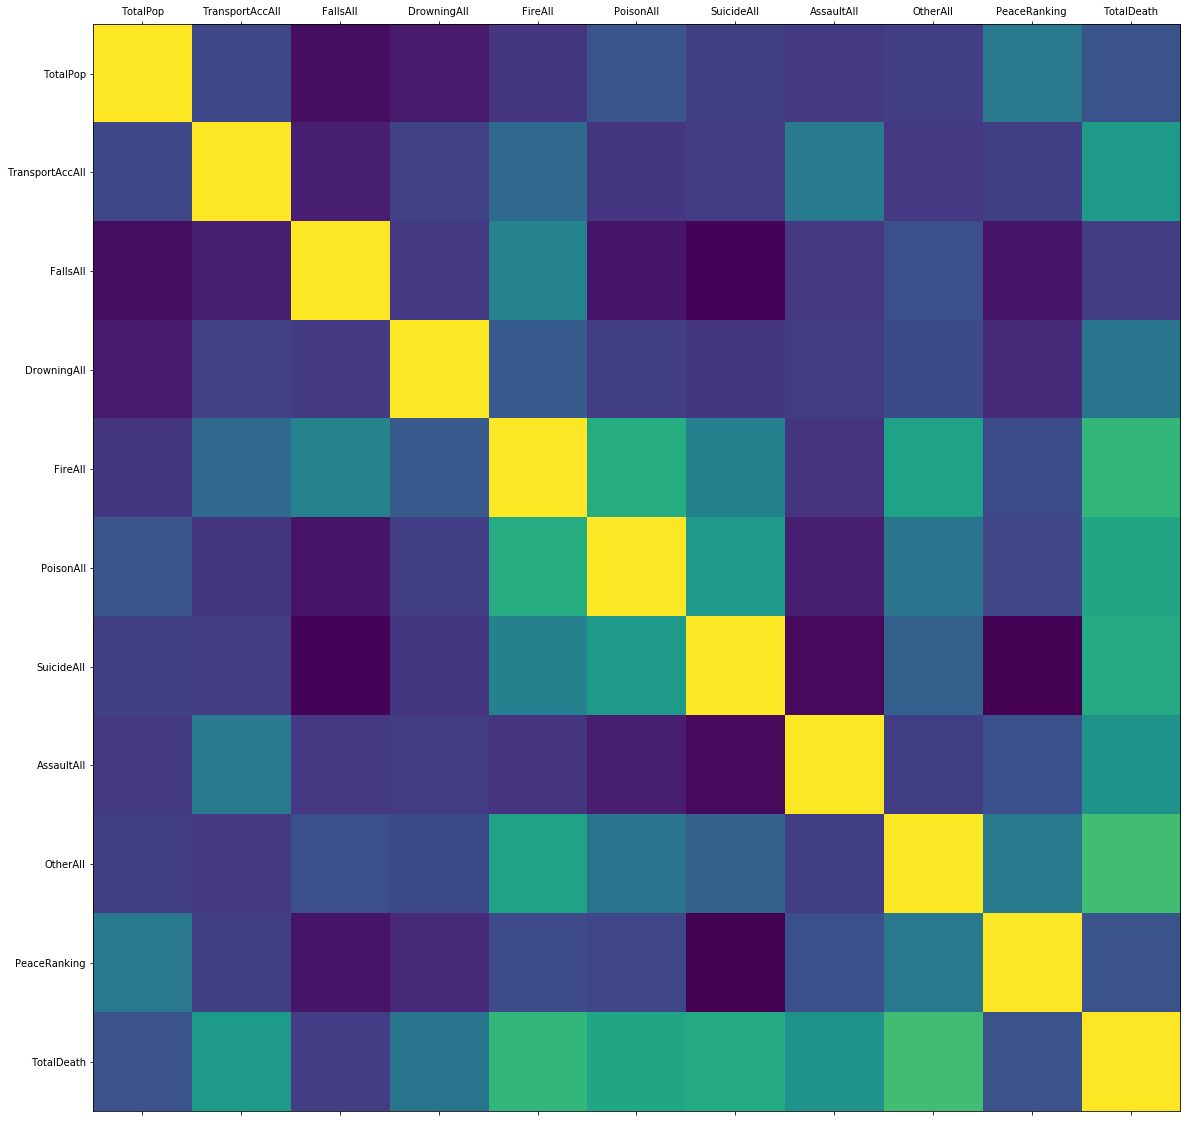

In [470]:

rtotaldf = plot_yearcorr(df, '2012')


# Since the Income level was in character format converted it to numeric format by Map function
IncomeLevel_map = {"Low Income" : 0, "Lower Middle Income" : 1, "Upper Middle Income" : 2, "High Income": 3}
rtotaldf['IncomeLevel'] = rtotaldf['IncomeLevel'].map(IncomeLevel_map)

IncomeLevel = rtotaldf['IncomeLevel']
rtotaldf.drop(labels=['IncomeLevel'], axis=1,inplace = True)
rtotaldf.insert(len(rtotaldf.columns), 'Incomelevel', IncomeLevel)

peaceranking  = rtotaldf['PeaceRanking']
rtotaldf.drop(labels=['PeaceRanking'], axis=1,inplace = True)
rtotaldf.insert(len(rtotaldf.columns), 'PeaceRanking', peaceranking)



#### Creating the training set based on the percentage  OR  Base on countries with missing Peace ranking

Several countries the Global peace ranking was not available.

In [471]:
#msk = np.random.rand(len(rtotaldf)) < 0.9
#train = rtotaldf[msk]
#test = rtotaldf[~msk]


train = rtotaldf[rtotaldf.PeaceRanking != 0]
test = rtotaldf[rtotaldf.PeaceRanking == 0]


In [472]:
# Print the percentage of test vs train
print("{0:0.2f}% in training set".format((len(train)/len(rtotaldf.index)) * 100))
print("{0:0.2f}% in test set".format((len(test)/len(rtotaldf.index)) * 100))

84.17% in training set
15.83% in test set


### Applying KNN Model 

#### KNN model using euclideanDistance

In [473]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [474]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        distances.append((trainingSet.iloc[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
        
    for x in range(k):
        neighbors.append(distances[x][0])        
    return neighbors

In [475]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
            sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
        return sortedVotes[0][0]

In [476]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if int(testSet.iloc[x][-1]) is int(predictions[x]):
            correct += 1
        #print(correct, x, testSet.iloc[x][-1], predictions[x])
    return (correct/float(len(testSet))) * 100.0

In [477]:
def main():
    # prepare data
    #trainingSet=[]
    #testSet=[]
    #split = 0.67

    print ('Train set: ' + repr(len(train)))
    print ('Test set: ' + repr(len(test)))
    # generate predictions
    predictions=[]
    k = 3
    for x in range(len(test)):
        neighbors = getNeighbors(train, test.iloc[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print(' predicted=' + repr(result) + ', actual=' + repr(test.iloc[x][-1]) + repr(test.index[x]) )
    accuracy = getAccuracy(test, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

main()

Train set: 117
Test set: 22
 predicted=3.0, actual=0.0'GRENADA'
 predicted=5.0, actual=0.0'GUADELOUPE'
 predicted=3.0, actual=0.0'KIRIBATI'
 predicted=4.0, actual=0.0'MALDIVES'
 predicted=2.0, actual=0.0'MALTA'
 predicted=2.0, actual=0.0'MARTINIQUE'
 predicted=1.0, actual=0.0'MAYOTTE'
 predicted=2.0, actual=0.0'MONACO'
 predicted=5.0, actual=0.0'MONTSERRAT'
 predicted=2.0, actual=0.0'OCCUPIED PALESTINIAN TERRITORY'
 predicted=3.0, actual=0.0'PUERTO RICO'
 predicted=3.0, actual=0.0'REUNION'
 predicted=2.0, actual=0.0'SAINT KITTS AND NEVIS'
 predicted=1.0, actual=0.0'SAINT LUCIA'
 predicted=5.0, actual=0.0'SAINT PIERRE AND MIQUELON'
 predicted=3.0, actual=0.0'SAINT VINCENT AND GRENADINES'
 predicted=2.0, actual=0.0'SAN MARINO'
 predicted=1.0, actual=0.0'SAO TOME AND PRINCIPE'
 predicted=3.0, actual=0.0'SEYCHELLES'
 predicted=1.0, actual=0.0'SURINAME'
 predicted=2.0, actual=0.0'TURKS AND CAICOS ISLANDS'
 predicted=3.0, actual=0.0'VIRGIN ISLANDS'
Accuracy: 0.0%


#### Drawing graph for Income vs Sucicde to see any trends. As You can see Income level of the country is no guarantee that people are happy.

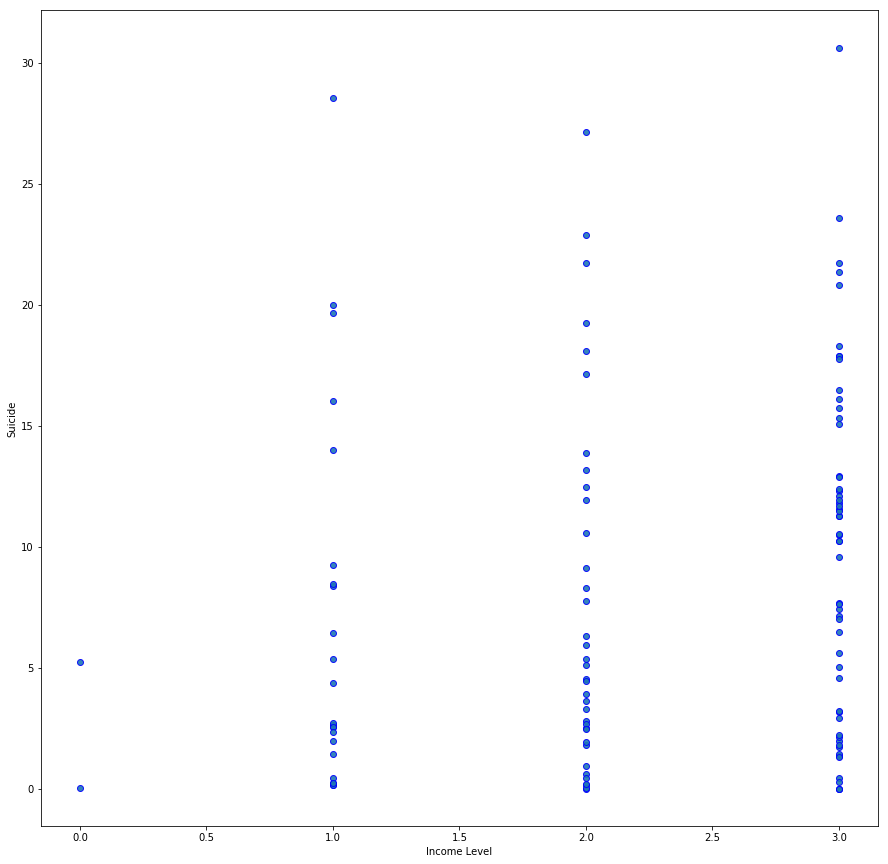

In [478]:

plt.figure (figsize=(15,15))
scatter( train.Incomelevel, train.SuicideAll,
         marker='o',
         edgecolor='b',
        # facecolor='none',
         alpha=0.9 )
xlabel('Income Level')
ylabel('Suicide')
#savefig('TotalPopvs Suicide.png', fmt='png', dpi=100)

#### Scatter graph of Population vs Suicide for countries with population below 3M for a given year, in this case 2012, but can be changed at the top.

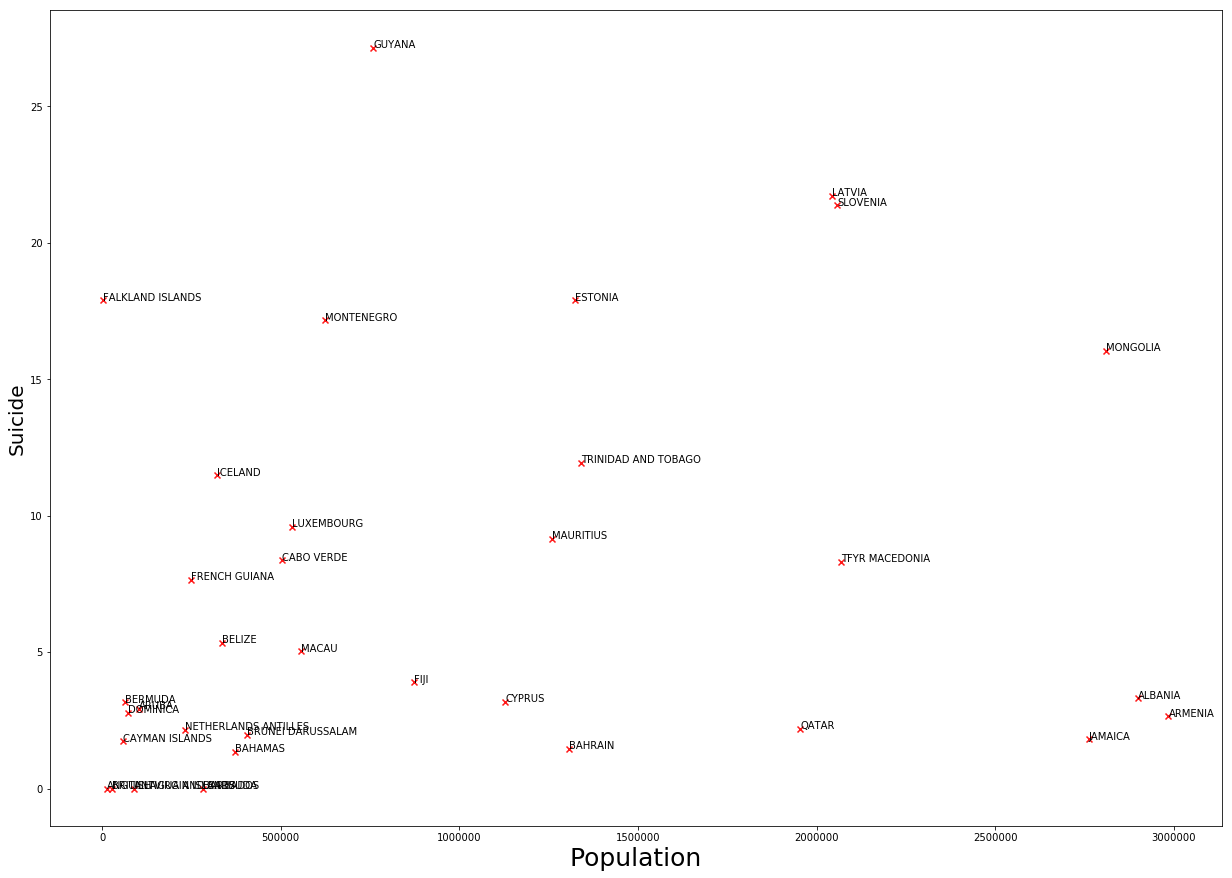

In [479]:
plt.figure (figsize=(15,15))

#2MP = population range <3M
M3P = 3000000

X= train[train.TotalPop < M3P].TotalPop
Y = train[train.TotalPop < M3P].SuicideAll
n = train[train.TotalPop < M3P].index

#Scatter plot for the Suicide
fig, ax = plt.subplots(figsize=(21,15))
ax.scatter( X, Y,
         marker='x',
         color='r',   
         edgecolor='b',
       # facecolor='none',
         alpha=0.9 )
xlabel('Population', size= 25)
ylabel('Suicide', size=20)

#populate the 
for i,txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]))


#### Scatter graph of Population vs Fire/Smoke deaths for countries with population below 3M for a given year

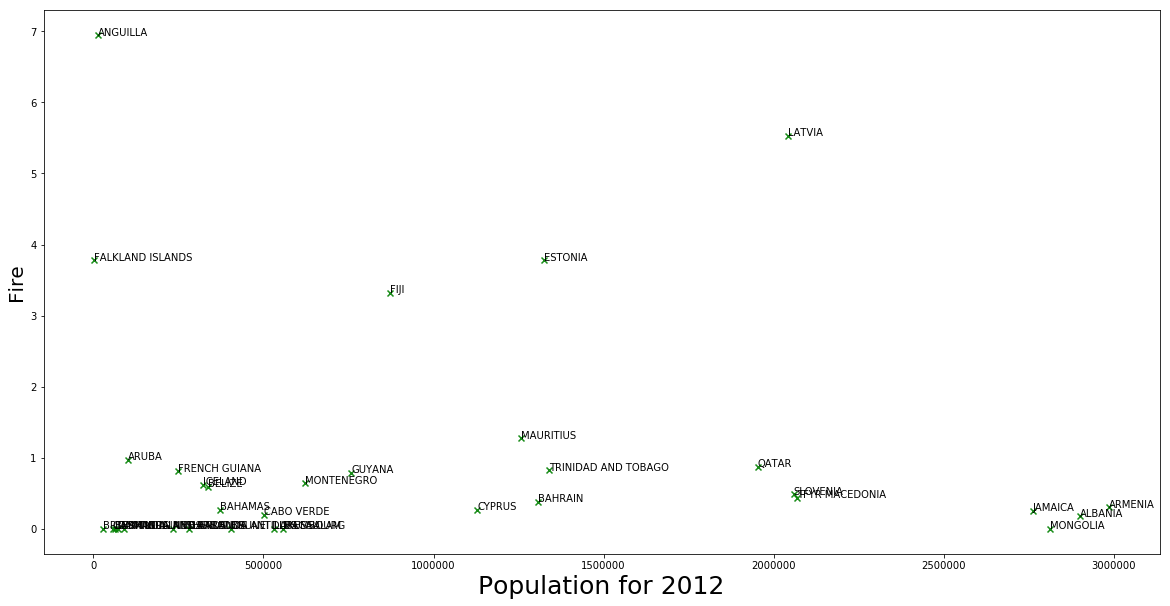

In [480]:
plt.figure (figsize=(15,15))
X= train[train.TotalPop < M3P].TotalPop
Y = train[train.TotalPop < M3P].FireAll
n = train[train.TotalPop < M3P].index

#Scatter plot for the Drowning
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter( X, Y,
         marker='x',
         color='g',   
         edgecolor='b',
       # facecolor='none',
         alpha=0.9 )
xlabel('Population for 2012', size= 25)
ylabel('Fire', size=20)

#populate the 
for i,txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]))


#### Scatter graph of Population vs Suicide deaths for countries with population above 100M for a given year

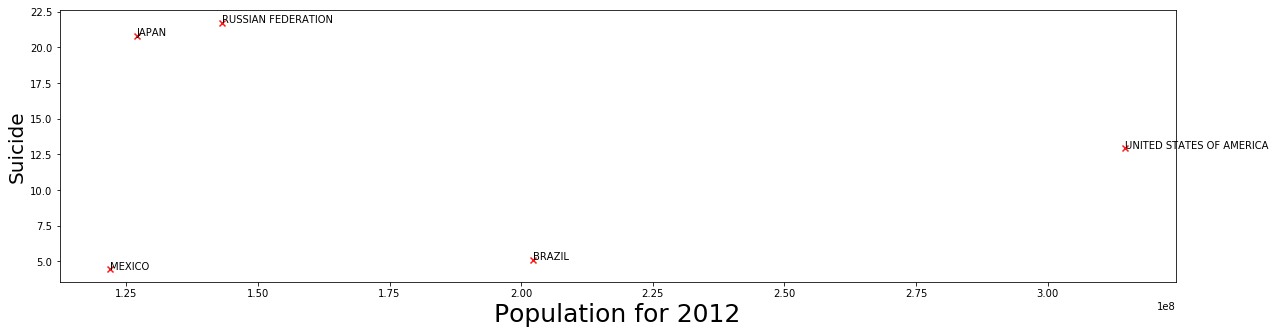

In [481]:
plt.figure (figsize=(15,15))

#P = population range <100M
P = 100000000

X= train[train.TotalPop > P].TotalPop
Y = train[train.TotalPop > P].SuicideAll
n = train[train.TotalPop > P].index

#Scatter plot for the Suicide
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter( X, Y,
         marker='x',
         color='r',   
         edgecolor='b',
       # facecolor='none',
         alpha=0.9 )
xlabel('Population for 2012', size= 25)
ylabel('Suicide', size=20)

#populate the 
for i,txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]))
    

#### Scatter graph of Population vs Fire/Smoke deaths for countries with population above 100M for a given year

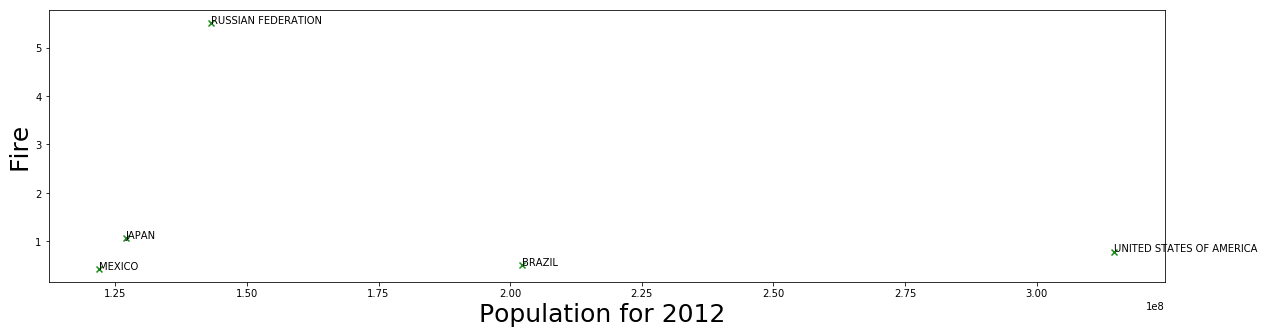

In [483]:
plt.figure (figsize=(15,15))
X= train[train.TotalPop > P].TotalPop
Y = train[train.TotalPop > P].FireAll
n = train[train.TotalPop > P].index

#Scatter plot for the Drowning
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter( X, Y,
         marker='x',
         color='g',   
         edgecolor='b',
       # facecolor='none',
         alpha=0.9 )
xlabel('Population for 2012 ', size= 25)
ylabel('Fire', size=25)

#populate the 
for i,txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]))


#### Create a dataset for fire deaths based mean for all years for a given country

In [484]:
firedf = pd.DataFrame(columns=[])

firedf["FireAll"] = df['FireAll'].groupby([df['Country']]).mean()
firedf["TotalPop"] = df['TotalPop'].groupby([df['Country']]).mean()
firedf.tail(5)

,FireAll,TotalPop
Country,,
URUGUAY,1.526032,3.261677e+06
UZBEKISTAN,1.670358,2.422939e+07
VENEZUELA,0.437893,2.443010e+07
VIRGIN ISLANDS,0.973521,1.063871e+05
ZIMBABWE,1.336785,1.230735e+07


#### Scatter graph of Population vs Fire/Smoke deaths for countries with population below 3M

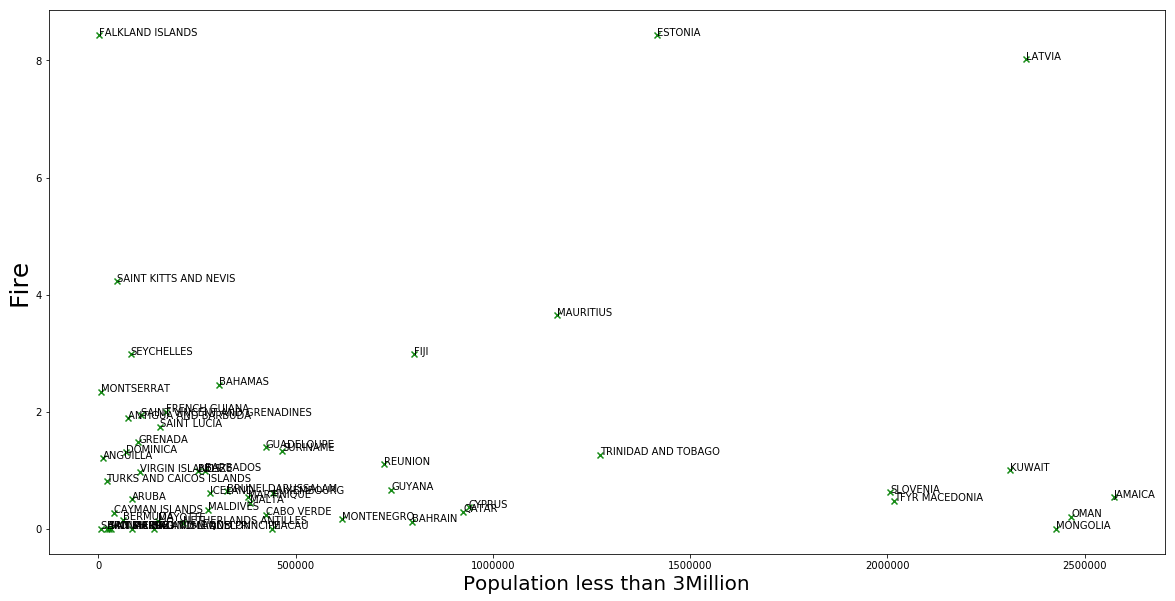

In [485]:
plt.figure (figsize=(15,15))
M3P = 3000000


X = firedf[firedf.TotalPop < M3P].TotalPop
Y = firedf[firedf.TotalPop < M3P].FireAll
n = firedf[firedf.TotalPop < M3P].index

#Scatter plot for the Drowning
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter( X, Y,
         marker='x',
         color='g',   
         edgecolor='b',
       # facecolor='none',
         alpha=0.9 )
xlabel('Population less than 3Million', size= 20)
ylabel('Fire', size=25)

#populate the 
for i,txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]))

#### Scatter graph of Population vs Fire/Smoke deaths for countries with population above 100M

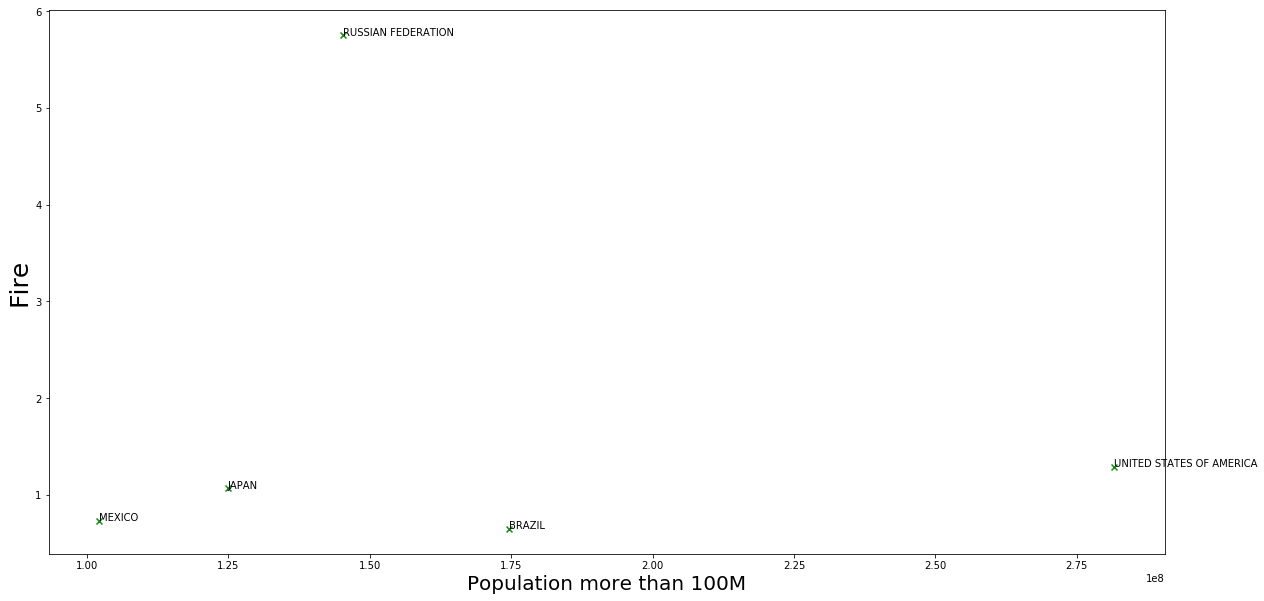

In [486]:
plt.figure (figsize=(15,15))

P = 100000000

X= firedf[firedf.TotalPop > P].TotalPop
Y = firedf[firedf.TotalPop > P].FireAll
n = firedf[firedf.TotalPop > P].index

#Scatter plot for the Drowning
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter( X, Y,
         marker='x',
         color='g',   
         edgecolor='b',
       # facecolor='none',
         alpha=0.9 )
xlabel('Population more than 100M', size= 20)
ylabel('Fire', size=25)



#populate the 
for i,txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]))

## Project report details the analysis of these notebook 